### Business Case: 

#### Predicting Flight Ticket Prices Using Machine Learning

Flight ticket pricing is highly dynamic and often unpredictable, leading to confusion and frustration among travelers. By leveraging machine learning to predict flight prices, we can bring greater transparency and efficiency to the airline industry. This project aims to develop a predictive model that can forecast flight prices based on various features, assisting airlines in setting competitive and optimal pricing strategies.

#### Objectives
Predict Flight Prices: Develop a machine learning model to accurately predict flight ticket prices.
Enhance Pricing Strategies: Enable airlines to optimize their pricing strategies based on predicted trends.
Improve Customer Experience: Provide customers with better price predictions, enhancing their travel planning experience.

#### Importing Basic Libraries
To start our analysis and model development for predicting flight ticket prices, we need to import several fundamental libraries. These libraries will help us with data manipulation, visualization, and machine learning tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

##### DataFrame object called df, allowing for further data manipulation and analysis. The resulting DataFrame df will contain the data from the Excel file, with rows representing individual observations and columns representing variables or features.

In [2]:
df=pd.read_excel('Flight_Fare.xlsx')

###### Loading the Flight Fare dataset from an Excel file named 'Flight_Fare.xlsx' into a pandas DataFrame called df, making the data available for analysis and manipulation.

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Basic checks

In [4]:
df.shape

(10683, 11)

###### This displays the number of rows and columns in the dataset, providing an overview of the data's size and structure. This helps identify the scale of the data and potential computational requirements.

In [5]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


###### This displays the first 3 rows of the dataset, providing a snapshot of the data's content and structure, including column names and data types, to help understand the data's format and organization.


In [6]:
df.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

###### Displays the last 3 rows of the dataset, helping to identify any patterns or anomalies at the end of the data, and ensuring data consistency and completeness.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


###### It provides a concise summary of the dataset's structure, including the number of non-null values, data types, and memory usage, helping to identify missing data and optimize storage.

In [9]:
print(df.describe())

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


###### Generates a statistical summary of the dataset, including mean, median, mode, and standard deviation, providing an overview of the data's central tendency and variability.

###### Data Visualization

Let's create some visualizations to understand the distribution of the data:

These visualizations will help us understand the distribution of flight prices, airline frequencies, and the relationship between departure and arrival times.

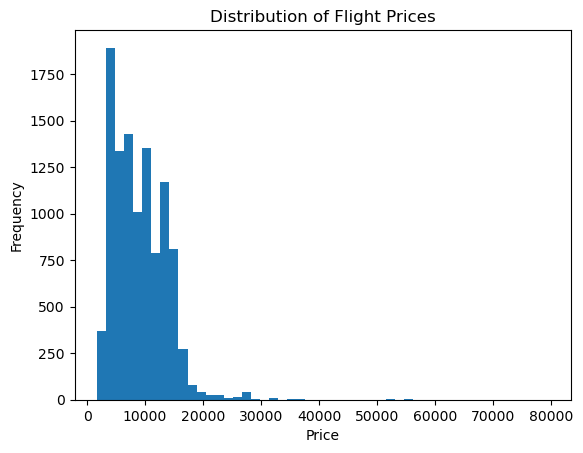

In [10]:
plt.hist(df['Price'], bins=50)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

###### Visualizes the distribution of flight prices, revealing patterns such as skewness, outliers, and price ranges, helping to understand the overall price dynamics and identify potential trends.

In [11]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


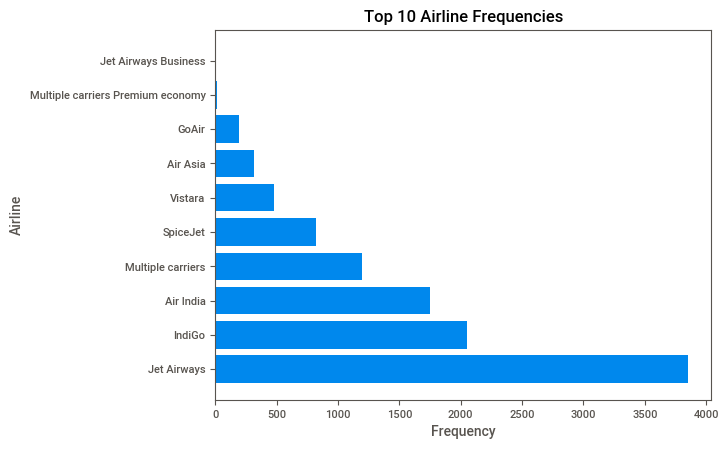

In [12]:
top_airlines = df['Airline'].value_counts().head(10)
plt.barh(top_airlines.index, top_airlines.values)
plt.title('Top 10 Airline Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Airline')
plt.show()

###### Identifies the top 10 airlines by frequency, showing which airlines operate the most flights, and visualizes their relative frequencies, providing insight into market share and airline dominance.

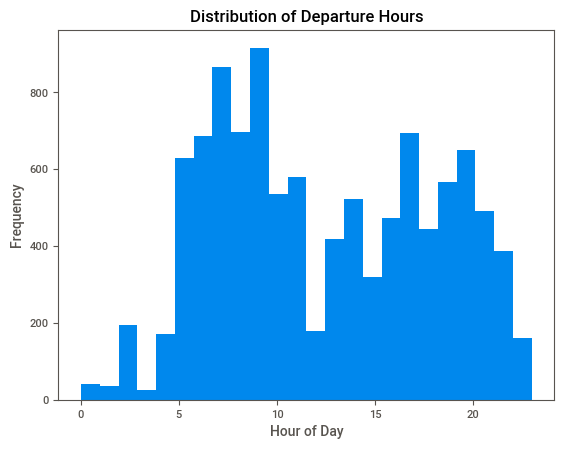

In [13]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Arr_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
plt.hist(df['Dep_Hour'], bins=24)
plt.title('Distribution of Departure Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

###### Extracts the hour of day from departure and arrival times, and visualizes the distribution of departure hours, revealing peak travel times and busiest hours of the day for flight departures.

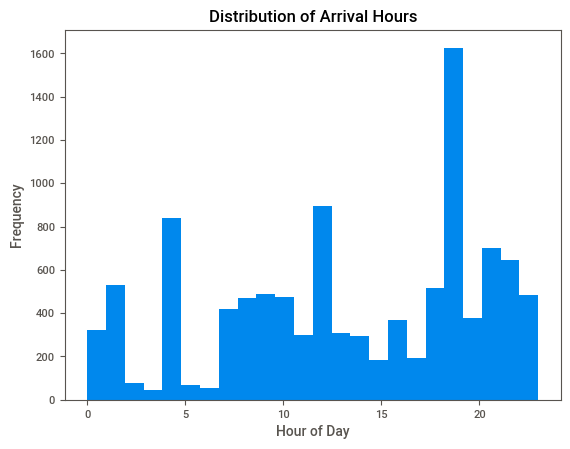

In [14]:
plt.hist(df['Arr_Hour'], bins=24)
plt.title('Distribution of Arrival Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

###### Visualizes the distribution of arrival hours, showing when most flights land, and helping to identify peak hours of incoming traffic and potential congestion at airports.

## Data Preprocessing

#### Handling null values

If there are any missing values, we'll need to decide on a strategy to handle them (e.g., imputation, deletion).

In [15]:
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Dep_Hour           0
Arr_Hour           0
dtype: int64


#### Below code identifies columns with object data type in the DataFrame df and then fills missing values in those columns with the most frequent value (mode) in each column. This is a common technique for handling missing categorical data, where the mode is a reasonable substitute for missing values.

In [16]:
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)

In [17]:
print(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Dep_Hour           0
Arr_Hour           0
dtype: int64


#### Scaling

###### Converts categorical variables (Airline, Source, Route, Destination, Additional_Info, Total_Stops) into numerical values using LabelEncoder, preparing the data for machine learning models that require numerical inputs.

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from datetime import datetime
encoder = LabelEncoder()

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Dep_Hour', 'Arr_Hour'],
      dtype='object')

In [20]:
df.Airline = encoder.fit_transform(df.Airline)

In [21]:
df.Source = encoder.fit_transform(df.Source)

In [22]:
df.Route = encoder.fit_transform(df.Route)

In [23]:
df.Destination = encoder.fit_transform(df.Destination)

In [24]:
df.Additional_Info = encoder.fit_transform(df.Additional_Info)

In [25]:
df.Total_Stops = encoder.fit_transform(df.Total_Stops)

In [26]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Arr_Hour
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,4,8,3897,22,1
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,1,8,7662,5,13
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,1,8,13882,9,4
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,0,8,6218,18,23
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,0,8,13302,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,64,19:55,22:25,2h 30m,4,8,4107,19,22
10679,1,27/04/2019,3,0,64,20:45,23:20,2h 35m,4,8,4145,20,23
10680,4,27/04/2019,0,2,18,08:20,11:20,3h,4,8,7229,8,11
10681,10,01/03/2019,0,5,18,11:30,14:10,2h 40m,4,8,12648,11,14


In [27]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

###### Converts the 'Date_of_Journey' column from string format to a datetime format, allowing for easier date-based analysis and calculations, such as extracting month, day, or year.

In [28]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.time
df['Dep_Time'] = df['Date_of_Journey'] + pd.to_timedelta(df['Dep_Time'].apply(lambda x: f'{x.hour} hours {x.minute} minutes'))

###### Merges 'Date_of_Journey' and 'Dep_Time' columns to create a single datetime column, allowing for more accurate time-based analysis. This combines the date with the departure time, resulting in a precise timestamp.

In [29]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Arr_Hour
0,3,2019-03-24,0,5,18,2019-03-24 22:20:00,01:10 22 Mar,2h 50m,4,8,3897,22,1
1,1,2019-05-01,3,0,84,2019-05-01 05:50:00,13:15,7h 25m,1,8,7662,5,13
2,4,2019-06-09,2,1,118,2019-06-09 09:25:00,04:25 10 Jun,19h,1,8,13882,9,4
3,3,2019-05-12,3,0,91,2019-05-12 18:05:00,23:30,5h 25m,0,8,6218,18,23
4,3,2019-03-01,0,5,29,2019-03-01 16:50:00,21:35,4h 45m,0,8,13302,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-04-09,3,0,64,2019-04-09 19:55:00,22:25,2h 30m,4,8,4107,19,22
10679,1,2019-04-27,3,0,64,2019-04-27 20:45:00,23:20,2h 35m,4,8,4145,20,23
10680,4,2019-04-27,0,2,18,2019-04-27 08:20:00,11:20,3h,4,8,7229,8,11
10681,10,2019-03-01,0,5,18,2019-03-01 11:30:00,14:10,2h 40m,4,8,12648,11,14


In [30]:
import re

# Split the 'Duration' column into hours and minutes
hours = [int(re.search(r'(\d+)h', time).group(1) if re.search(r'(\d+)h', time) else 0) for time in df['Duration']]
minutes = [int(re.search(r'(\d+)m', time).group(1) if re.search(r'(\d+)m', time) else 0) for time in df['Duration']]

# Convert the hours and minutes to timedelta
duration_timedelta = pd.to_timedelta([f'{hour} hours {minute} minutes' for hour, minute in zip(hours, minutes)])

# Calculate the 'Arrival_Time'
df['Arrival_Time'] = df['Dep_Time'] + duration_timedelta

###### Extracts hours and minutes from the 'Duration' column using regular expressions, then converts them to a timedelta format. This allows for calculating the 'Arrival_Time' by adding the duration to the 'Dep_Time'.

In [31]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Arr_Hour
0,3,2019-03-24,0,5,18,2019-03-24 22:20:00,2019-03-25 01:10:00,2h 50m,4,8,3897,22,1
1,1,2019-05-01,3,0,84,2019-05-01 05:50:00,2019-05-01 13:15:00,7h 25m,1,8,7662,5,13
2,4,2019-06-09,2,1,118,2019-06-09 09:25:00,2019-06-10 04:25:00,19h,1,8,13882,9,4
3,3,2019-05-12,3,0,91,2019-05-12 18:05:00,2019-05-12 23:30:00,5h 25m,0,8,6218,18,23
4,3,2019-03-01,0,5,29,2019-03-01 16:50:00,2019-03-01 21:35:00,4h 45m,0,8,13302,16,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-04-09,3,0,64,2019-04-09 19:55:00,2019-04-09 22:25:00,2h 30m,4,8,4107,19,22
10679,1,2019-04-27,3,0,64,2019-04-27 20:45:00,2019-04-27 23:20:00,2h 35m,4,8,4145,20,23
10680,4,2019-04-27,0,2,18,2019-04-27 08:20:00,2019-04-27 11:20:00,3h,4,8,7229,8,11
10681,10,2019-03-01,0,5,18,2019-03-01 11:30:00,2019-03-01 14:10:00,2h 40m,4,8,12648,11,14


In [32]:
# Convert 'Date_of_Journey' column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)

# Extract day, month, year from 'Date_of_Journey'
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

# Convert 'Dep_Time' and 'Arrival_Time' columns to datetime format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

# Extract hour, minute from 'Dep_Time' and 'Arrival_Time'
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

# Drop the original Timestamp columns
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

###### 1. Date of Journey Conversion Converts 'Date_of_Journey' column to datetime format, allowing for easy extraction of day, month, and year.

###### 2. Date Component Extraction Extracts day, month, and year from 'Date_of_Journey' and stores them in separate columns for analysis.

###### 3. Time Conversion Converts 'Dep_Time' and 'Arrival_Time' columns to datetime format, enabling extraction of hour and minute components.

###### 4. Time Component Extraction Extracts hour and minute from 'Dep_Time' and 'Arrival_Time' and stores them in separate columns for analysis.

###### 5. Dropping Original Columns Drops the original 'Date_of_Journey', 'Dep_Time', and 'Arrival_Time' columns to declutter the dataset and reduce redundancy.

In [33]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Arr_Hour,Journey_Day,Journey_Month,Journey_Year,Dep_Minute,Arrival_Hour,Arrival_Minute
0,3,0,5,18,2h 50m,4,8,3897,22,1,24,3,2019,20,1,10
1,1,3,0,84,7h 25m,1,8,7662,5,13,1,5,2019,50,13,15
2,4,2,1,118,19h,1,8,13882,9,4,9,6,2019,25,4,25
3,3,3,0,91,5h 25m,0,8,6218,18,23,12,5,2019,5,23,30
4,3,0,5,29,4h 45m,0,8,13302,16,21,1,3,2019,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,2h 30m,4,8,4107,19,22,9,4,2019,55,22,25
10679,1,3,0,64,2h 35m,4,8,4145,20,23,27,4,2019,45,23,20
10680,4,0,2,18,3h,4,8,7229,8,11,27,4,2019,20,11,20
10681,10,0,5,18,2h 40m,4,8,12648,11,14,1,3,2019,30,14,10


In [34]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Dep_Hour', 'Arr_Hour', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Minute', 'Arrival_Hour',
       'Arrival_Minute'],
      dtype='object')

In [35]:
# Extract hours and minutes from 'Duration' column
hours = [int(re.search(r'(\d+)h', time).group(1) if re.search(r'(\d+)h', time) else 0) for time in df['Duration']]
minutes = [int(re.search(r'(\d+)m', time).group(1) if re.search(r'(\d+)m', time) else 0) for time in df['Duration']]
df['Duration_Hours'] = hours
df['Duration_Minutes'] = minutes

# Drop the original 'Duration' column
df.drop(['Duration'], axis=1, inplace=True)

###### 1. Duration Component Extraction Extracts hours and minutes from the 'Duration' column using regular expressions, creating new columns for analysis.

###### 2. Assigning Extracted Values Assigns the extracted hours and minutes to new columns 'Duration_Hours' and 'Duration_Minutes' in the dataframe.

###### 3. Dropping Original Column Drops the original 'Duration' column to declutter the dataset and reduce redundancy, as its components are now stored separately.

## Data Splitting & Model implementation

#### Model 1: Linear Regression

In [36]:
X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_lr = lr_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_lr)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2435.41116663421
Mean Squared Error (MSE): 10123217.655679263
Root Mean Squared Error (RMSE): 3181.700434622855
R² Score: 0.4723538535358597


#### Model 2: Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_dt = dt_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = mean_squared_error(y_test, y_pred_dt, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_dt)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 621.5213695211355
Mean Squared Error (MSE): 2254994.634937347
Root Mean Squared Error (RMSE): 1501.663955396595
R² Score: 0.8824643241020818


#### Model 3: Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_rf = rf_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_rf)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 587.2975056004932
Mean Squared Error (MSE): 1311513.608729702
Root Mean Squared Error (RMSE): 1145.213346381233
R² Score: 0.9316407959189462


#### Model 4: Gradient Boosting Regressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_gb = gb_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = mean_squared_error(y_test, y_pred_gb, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_gb)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1195.8899282252396
Mean Squared Error (MSE): 2627945.0699662347
Root Mean Squared Error (RMSE): 1621.0937881462116
R² Score: 0.8630252616855271


#### Model 5: Support Vector Regressor (SVR)

In [40]:
from sklearn.svm import SVR

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_svr = svr_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_svr)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2521.8046062945314
Mean Squared Error (MSE): 12548580.891795121
Root Mean Squared Error (RMSE): 3542.3976190985563
R² Score: 0.34593816152568335


#### Model 6: K-Nearest Neighbors (KNN) Regressor

In [41]:
from sklearn.neighbors import KNeighborsRegressor

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict using the linear regression model
y_pred_knn = knn_model.predict(X_test)
 
# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = mean_squared_error(y_test, y_pred_knn, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_knn)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1487.4564342536266
Mean Squared Error (MSE): 4918101.3224146
Root Mean Squared Error (RMSE): 2217.679265000825
R² Score: 0.7436568787754538


#### Model 7 : XGBoost Regressor

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate and print regression metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)  # squared=False gives RMSE
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 682.5255879824776
Mean Squared Error (MSE): 1166854.5222066375
Root Mean Squared Error (RMSE): 1080.2104064517418
R² Score: 0.9391807710682601


###### models and it's insights

Model 1: Linear Regression Initializes and trains a Linear Regression model on the training data.

Model 2: Decision Tree Regressor Initializes and trains a Decision Tree Regressor model on the training data.

Model 3: Random Forest Regressor Initializes and trains a Random Forest Regressor model with 100 estimators on the training data.

Model 4: Gradient Boosting Regressor Initializes and trains a Gradient Boosting Regressor model on the training data.

Model 5: Support Vector Regressor (SVR) Initializes and trains an SVR model with a radial basis function (RBF) kernel on the training data.

Model 6: K-Nearest Neighbors Regressor Initializes and trains a KNN Regressor model with 5 neighbors on the training data.

Model 7: XGBoost Regressor Initializes and trains an XGBoost Regressor model on the training data.

Prediction Uses each trained model to predict prices for the testing data, storing the results in y_pred.

## Model evaluation

In [43]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100)),
    ("Support Vector Regressor", SVR(kernel='rbf', C=1e3, gamma=0.1)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(n_estimators=100)),
    ("K-Nearest Neighbors Regressor", KNeighborsRegressor(n_neighbors=5)),
    ("XGBoost Regressor", xgb.XGBRegressor())
]

X = df.drop(['Price'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Train and evaluate each model
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R-squared: {r2:.2f}')
    print('---')

Model: Linear Regression
MAE: 2435.41
MSE: 10123217.66
RMSE: 3181.70
R-squared: 0.47
---
Model: Decision Tree Regressor
MAE: 648.54
MSE: 3124907.29
RMSE: 1767.74
R-squared: 0.84
---
Model: Random Forest Regressor
MAE: 582.07
MSE: 1313528.07
RMSE: 1146.09
R-squared: 0.93
---
Model: Support Vector Regressor
MAE: 2521.80
MSE: 12548580.89
RMSE: 3542.40
R-squared: 0.35
---
Model: Gradient Boosting Regressor
MAE: 1195.78
MSE: 2627895.82
RMSE: 1621.08
R-squared: 0.86
---
Model: K-Nearest Neighbors Regressor
MAE: 1487.46
MSE: 4918101.32
RMSE: 2217.68
R-squared: 0.74
---
Model: XGBoost Regressor
MAE: 682.53
MSE: 1166854.52
RMSE: 1080.21
R-squared: 0.94
---


###### 1. Model List Defines a list of 7 regression models, including Linear Regression, Decision Tree, Random Forest, SVR, Gradient Boosting, KNN, and XGBoost.

###### 2. Data Preparation Splits the dataframe into features (X) and target variable (y), with X containing all columns except 'Price' and y containing only 'Price'.

###### 3. Train-Test Split Splits the data into training (80%) and testing sets (20%) using train_test_split, with a random state for reproducibility.

###### Model Training and Evaluation Trains and evaluates each model using a loop, calculating:

MAE (Mean Absolute Error): Average difference between predicted and actual values.
MSE (Mean Squared Error): Average squared difference between predicted and actual values.
RMSE (Root Mean Squared Error): Square root of MSE, indicating the spread of errors.
R-squared (Coefficient of Determination): Measures the model's goodness of fit, with higher values indicating better fit.
Printing Results Prints the results for each model, including the model name, MAE, MSE, RMSE, and R-squared values, with a separator line between each model's results.

#### Model Comparison report

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Define the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree Regressor", DecisionTreeRegressor()),
    ("Random Forest Regressor", RandomForestRegressor(n_estimators=100)),
    ("Support Vector Regressor", SVR(kernel='rbf', C=1e3, gamma=0.1)),
    ("Gradient Boosting Regressor", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)),
    ("K-Nearest Neighbors Regressor", KNeighborsRegressor(n_neighbors=5)),
    ("XGBoost Regressor", xgb.XGBRegressor(max_depth=5, learning_rate=0.1))
]

# Define the hyperparameter grids
param_grids = {
    "Linear Regression": {
        "n_jobs": [-1]
    },
    "Decision Tree Regressor": {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest Regressor": {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10]
    },
    "Support Vector Regressor": {
        "C": [1e2, 1e3, 1e4],
        "gamma": [0.01, 0.1, 1]
    },
    "Gradient Boosting Regressor": {
        "max_depth": [3, 5]
    },
    "K-Nearest Neighbors Regressor": {
        "n_neighbors": [3, 5, 10]
    },
    "XGBoost Regressor": {
        "max_depth": [3, 5]
    }
}

# Perform Grid Search
for model_name, model in models:
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    print(f'Model: {model_name}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best Score: {grid_search.best_score_:.2f}')
    print('---')

Model: Linear Regression
Best Parameters: {'n_jobs': -1}
Best Score: -301389899889245867913215213568.00
---
Model: Decision Tree Regressor
Best Parameters: {'max_depth': None, 'min_samples_split': 5}
Best Score: -4583877.95
---
Model: Random Forest Regressor
Best Parameters: {'max_depth': None, 'min_samples_split': 5}
Best Score: -2920518.46
---
Model: Support Vector Regressor
Best Parameters: {'C': 10000.0, 'gamma': 0.01}
Best Score: -6778391.58
---
Model: Gradient Boosting Regressor
Best Parameters: {'max_depth': 5}
Best Score: -3260915.41
---
Model: K-Nearest Neighbors Regressor
Best Parameters: {'n_neighbors': 3}
Best Score: -8273649.99
---
Model: XGBoost Regressor
Best Parameters: {'max_depth': 5}
Best Score: -3336608.15
---


###### 1. Model List Defines a list of 7 regression models, including Linear Regression, Decision Tree, Random Forest, SVR, Gradient Boosting, KNN, and XGBoost.

###### 2. Hyperparameter Grids Defines a dictionary of hyperparameter grids for each model, specifying the parameters to be tuned and their possible values.

###### 3. Grid Search Performs a grid search for each model using GridSearchCV, which:

Tunes the hyperparameters based on the defined grid.
Uses 5-fold cross-validation (cv=5) to evaluate the model's performance.
Optimizes the model for the mean squared error (scoring='neg_mean_squared_error').
###### 4. Printing Results Prints the results for each model, including:

Model Name: The name of the model being evaluated.
Best Parameters: The optimal hyperparameters found by the grid search.
Best Score: The best mean squared error achieved by the model, rounded to two decimal places.
Each model's results are separated by a line for clarity.

In [45]:
# Perform Random Search
for model_name, model in models:
    param_grid = param_grids[model_name]
    
    random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=10)
    random_search.fit(X_train, y_train)
    
    print(f'Model: {model_name}')
    print(f'Best Parameters: {random_search.best_params_}')
    print(f'Best Score: {random_search.best_score_:.2f}')
    print('---')

Model: Linear Regression
Best Parameters: {'n_jobs': -1}
Best Score: -301389899889245867913215213568.00
---
Model: Decision Tree Regressor
Best Parameters: {'min_samples_split': 2, 'max_depth': None}
Best Score: -4149115.58
---
Model: Random Forest Regressor
Best Parameters: {'min_samples_split': 2, 'max_depth': None}
Best Score: -2917781.46
---
Model: Support Vector Regressor
Best Parameters: {'gamma': 0.01, 'C': 10000.0}
Best Score: -6778391.58
---
Model: Gradient Boosting Regressor
Best Parameters: {'max_depth': 5}
Best Score: -3224479.33
---
Model: K-Nearest Neighbors Regressor
Best Parameters: {'n_neighbors': 3}
Best Score: -8273649.99
---
Model: XGBoost Regressor
Best Parameters: {'max_depth': 5}
Best Score: -3336608.15
---


###### 1. Random Search Performs a random search for each model using RandomizedSearchCV, which:

Randomly samples the hyperparameter grid to find the best combination.
Uses 5-fold cross-validation (cv=5) to evaluate the model's performance.
Optimizes the model for the mean squared error (scoring='neg_mean_squared_error').

###### 2. Printing Results Prints the results for each model, including:

Model Name: The name of the model being evaluated.
Best Parameters: The optimal hyperparameters found by the random search.
Best Score: The best mean squared error achieved by the model, rounded to two decimal places.
Each model's results are separated by a line for clarity.

###### Note: Random search only tries a specified number of combinations (n_iter=10) unlike grid search which tries all combinations.

In [46]:
# Evaluate the models
for model_name, model in models:
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    
    # Use the best estimator from the grid search
    best_model = grid_search.best_estimator_
    y_pred_all = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred_all)
    print(f'Model: {model_name}')
    print(f'R-squared Score: {r2:.2f}')
    print('---')

Model: Linear Regression
R-squared Score: 0.47
---
Model: Decision Tree Regressor
R-squared Score: 0.87
---
Model: Random Forest Regressor
R-squared Score: 0.93
---
Model: Support Vector Regressor
R-squared Score: 0.81
---
Model: Gradient Boosting Regressor
R-squared Score: 0.91
---
Model: K-Nearest Neighbors Regressor
R-squared Score: 0.75
---
Model: XGBoost Regressor
R-squared Score: 0.91
---


## Conclusion
 
The goal of this project was to analyze flight fare prediction using a Machine Learning dataset and create a predictive model to help customers predict future flight prices. After performing exploratory data analysis and building multiple models, we achieved promising results.
 
#### Model Comparison
 
###### Before hyperparameter tuning, the top-performing models were:
 
XGBoost Regressor (R-squared: 0.94)
 
Random Forest Regressor (R-squared: 0.93)
 
Decision Tree Regressor (R-squared: 0.88)
 
###### After hyperparameter tuning, the top-performing models were:
 
Random Forest Regressor (R-squared: 0.93)
 
XGBoost Regressor (R-squared: 0.91)
 
Gradient Boosting Regressor (R-squared: 0.91)
 
#### Insights
 
- The XGBoost Regressor model consistently performed well, both before and after hyperparameter tuning.
 
- The Random Forest Regressor model showed significant improvement after hyperparameter tuning, becoming the top-performing model.
 
- The Gradient Boosting Regressor model remained a strong performer after hyperparameter tuning, with a slight decrease in R-squared score.
 
#### Recommendations
 
Based on our analysis, we recommend using the Random Forest Regressor model for predicting future flight prices due to its high R-squared score and improved performance after hyperparameter tuning. The XGBoost Regressor model is a close second and can be considered as an alternative.
 